# Inspecting the dataset

Let's first load our challenge dataset. We will download the data from the Kaggle website and load it using a pandas dataframe:

In [1]:
import pandas as pd

loan_dataset = pd.read_csv("../datasets/loan.csv")
loan_dataset.head()

,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,year,job_stability,default,occupation
0,minority-yes,male,MT04PA,1,57.230650,36.050927,205168.022244,7600.292199,3.302193,0,3.015554,default-yes,MZ10CD
1,minority-yes,male,MT04PA,1,45.891343,59.525251,187530.409981,5534.271289,3.843058,0,5.938132,default-yes,MZ10CD
2,minority-yes,male,MT04PA,1,46.775489,67.338108,196912.006690,2009.903438,2.059034,0,2.190777,default-yes,MZ10CD
3,minority-yes,male,MT04PA,1,41.784839,24.067401,132911.650615,3112.280893,3.936169,0,1.725860,default-yes,MZ10CD
4,minority-yes,male,MT04PA,1,41.744838,47.496605,161162.551205,1372.077093,3.709910,0,0.883104,default-yes,MZ10CD


Let's inspect the columns of the dataset:

In [2]:
loan_dataset.columns

Index(['minority', 'sex', 'ZIP', 'rent', 'education', 'age', 'income',
       'loan_size', 'payment_timing', 'year', 'job_stability', 'default',
       'occupation'],
      dtype='object')

Let's inspect the number of observations:

In [24]:
len(loan_dataset)

480000

Let's define which features of the dataset are numerical and which categorical:



In [3]:
# Define categorical features
categorical_features = ["sex", "rent", "minority", "ZIP", "occupation"]

# Define numeric features
numeric_features = [
    "education", "age", "income", "loan_size", "payment_timing",
    "year", "job_stability"
]

# Set dtype for categorical features
for cat in categorical_features:
    loan_dataset[cat] = loan_dataset[cat].astype("object")

Let's create the `X` and `y` of our ML problem:

In [4]:
X = loan_dataset.copy().drop(["minority", "default"], axis=1)
y = loan_dataset.copy()["default"]

# Visually inspect minority distribution

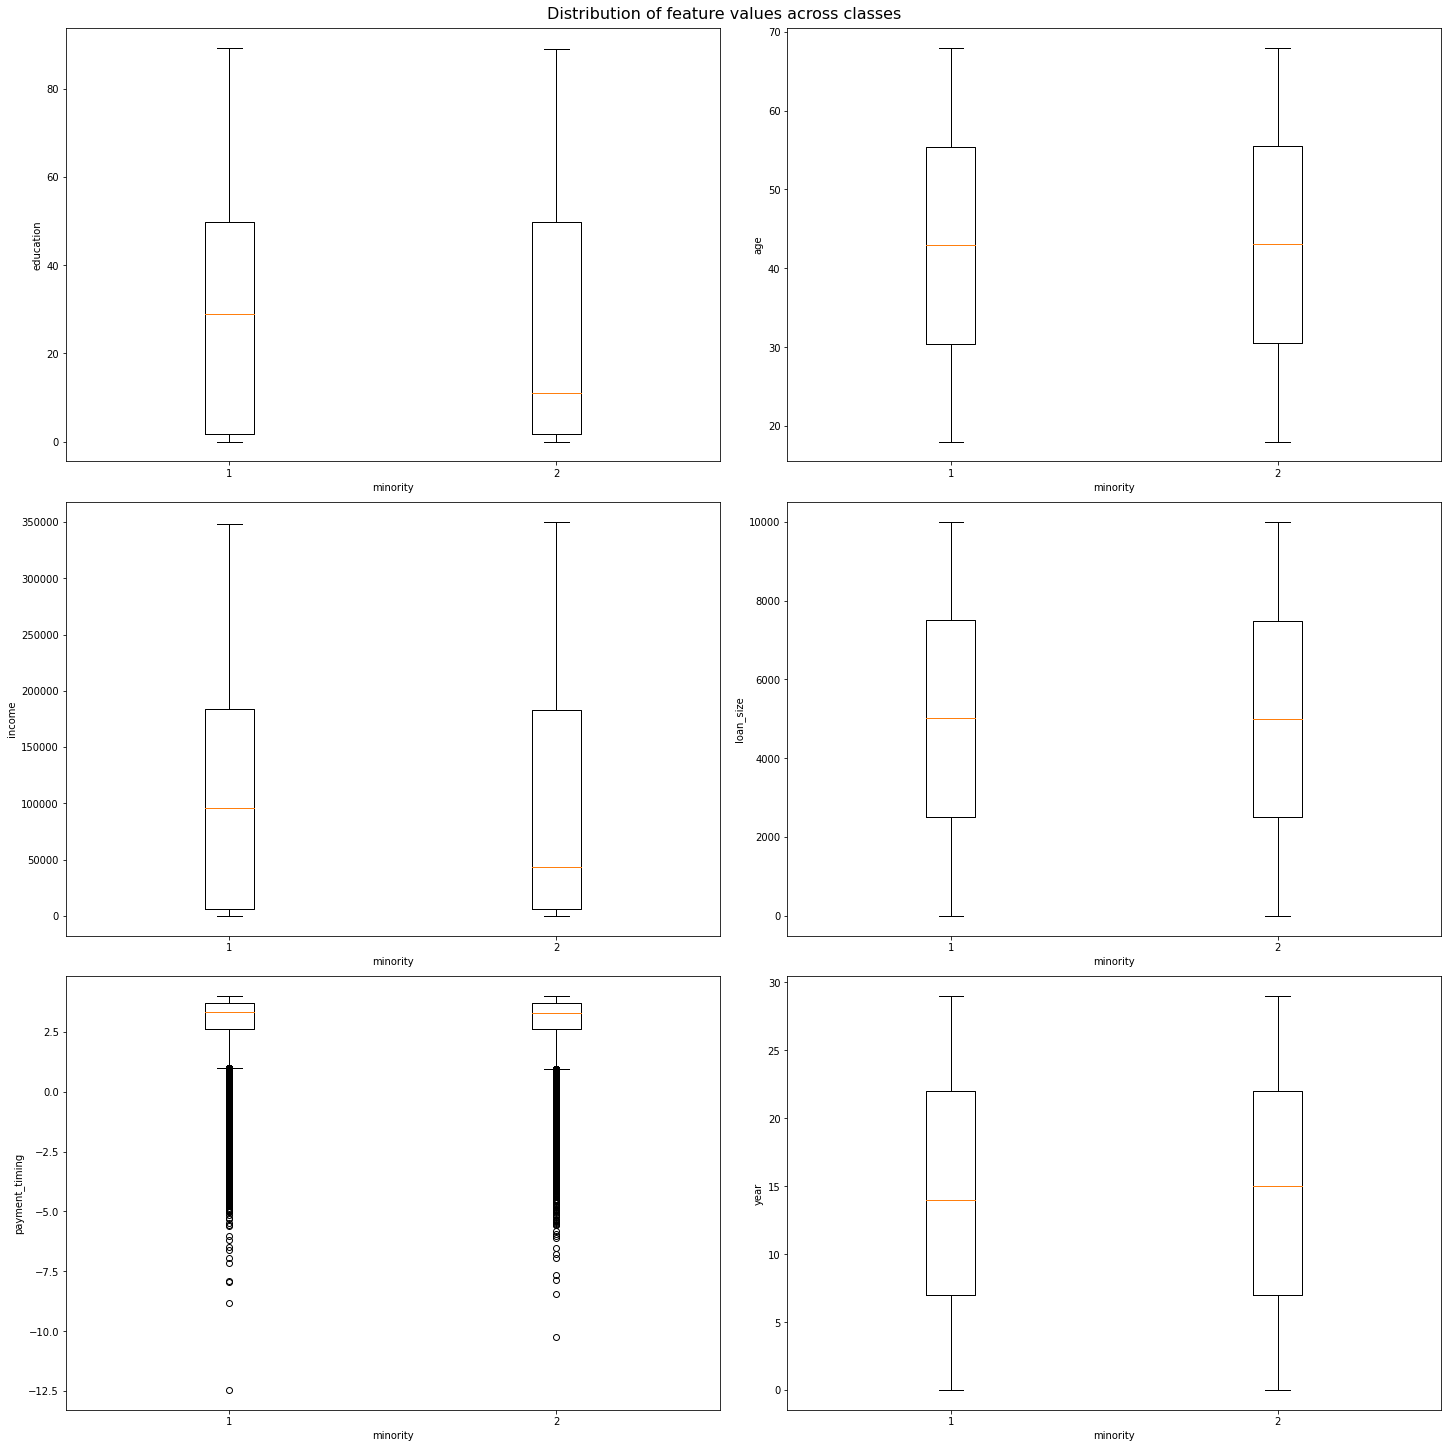

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define number of columns and rows
nrows = int(len(numeric_features)/2)
ncols = 2

# Create figure
fig, axes = plt.subplots(nrows, ncols, figsize=(20,20), constrained_layout=True)
fig.suptitle("Distribution of feature values across classes", fontsize=16)

# Iterate over axes (subfigures)
for idx, ax in enumerate(axes.flatten()):
    
    # Create list of feature values per class
    feature_by_class = [
        (loan_dataset.loc[loan_dataset["minority"]==c]
         [numeric_features[idx]].values)
        for c in set(loan_dataset["minority"])
    ]
        
    # Create boxplot
    ax.boxplot(feature_by_class)
    #sns.violinplot(feature_by_class)
    # sns.violinplot(
    #     x="minority", y=numeric_features[idx], data=loan_dataset, ax=ax
    # )
    
    # Set labels
    ax.set_xlabel("minority")
    ax.set_ylabel(f"{numeric_features[idx]}")

plt.show()

In [6]:
loan_dataset.groupby("minority").mean()

,education,age,income,loan_size,payment_timing,year,job_stability
minority,,,,,,,
minority-no,26.004133,43.005323,96153.156204,5001.262974,2.998046,14.502538,89.863856
minority-yes,26.039383,42.968505,96294.198185,5008.746145,3.001442,14.497459,2.061528


In [7]:
loan_dataset.groupby("sex").mean()

,education,age,income,loan_size,payment_timing,year,job_stability
sex,,,,,,,
female,2.006860,42.983031,7419.333176,5010.193518,2.997546,14.5,45.988904
male,50.036632,42.990822,185027.923071,4999.810394,3.001940,14.5,45.997575


In [8]:
loan_dataset.groupby(["minority", "sex"]).mean()

education        age         income    loan_size  \
minority     sex                                                        
minority-no  female   2.008317  43.026059    7425.392529  5001.507555   
             male    50.010942  42.984577  184921.567800  5001.018280   
minority-yes female   2.005400  42.939924    7413.262603  5018.895565   
             male    50.062345  42.997074  185134.377652  4998.601379   

                     payment_timing       year  job_stability  
minority     sex                                               
minority-no  female        2.995500  14.503093      89.845254  
             male          3.000592  14.501982      89.882467  
minority-yes female        2.999595  14.496901       2.051346  
             male          3.003289  14.498016       2.071705

In [9]:
loan_dataset["minority"].value_counts()

minority-no     240167
minority-yes    239833
Name: minority, dtype: int64

In [10]:
loan_dataset["sex"].value_counts()

male      240000
female    240000
Name: sex, dtype: int64

Let's count the number of defaulters and non-defaulters:

In [11]:
loan_dataset["default"].value_counts()

default-no     240073
default-yes    239927
Name: default, dtype: int64

It is a non-biased dataset!

In [34]:
f = ["minority"]

grouped_dataset = loan_dataset.copy().set_index(f)
categorical_dataset = (
    grouped_dataset.copy().select_dtypes(include=["object", "bool"])
)
categorical_dataset = pd.get_dummies(categorical_dataset)
categorical_dataset
grouped_categorical_dataset = categorical_dataset.groupby(level=0).sum().values / loan_dataset[f].value_counts().values.reshape((-1, 1))
pd.DataFrame(grouped_categorical_dataset * 100)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,50.011450,49.988550,49.925260,0.077862,49.929424,0.067453,94.813609,5.186391,99.854684,0.145316,100.0,0.000000,0.000000
1,49.988534,50.011466,0.040028,49.956845,0.035858,49.967269,10.129548,89.870452,0.106324,99.893676,0.0,50.011466,49.988534


In [29]:
test = loan_dataset[f].value_counts().values
test = test.reshape((-1, 1))
test.shape

(2, 1)

In [22]:
categorical_dataset.groupby(level=0).sum().values.shape

(2, 13)

In [30]:
import numpy as np

np.divide(categorical_dataset.groupby(level=0).sum().values, test)

array([[5.00114504e-01, 4.99885496e-01, 4.99252603e-01, 7.78624874e-04,
        4.99294241e-01, 6.74530639e-04, 9.48136089e-01, 5.18639114e-02,
        9.98546844e-01, 1.45315551e-03, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.99885337e-01, 5.00114663e-01, 4.00278527e-04, 4.99568450e-01,
        3.58582847e-04, 4.99672689e-01, 1.01295485e-01, 8.98704515e-01,
        1.06323984e-03, 9.98936760e-01, 0.00000000e+00, 5.00114663e-01,
        4.99885337e-01]])